In [15]:
import cobra
from cobra.medium import minimal_medium

In [16]:
model = cobra.io.read_sbml_model("/home/maria/Documents/Python/02_semester/EXAM/RAW264_7.xml")

Model does not contain SBML fbc package information.
'' is not a valid SBML 'SId'.
SBML package 'layout' not supported by cobrapy, information is not parsed
SBML package 'render' not supported by cobrapy, information is not parsed
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_10fthf5glu_c "10-formyltetrahydrofolate-[Glu](5)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_10fthf5glu_l "10-formyltetrahydrofolate-[Glu](5)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_10fthf5glu_m "10-formyltetrahydrofolate-[Glu](5)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_10fthf_c "10-Formyltetrahydrofolate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_10fthf_l "10-Formyltetrahydrofolate">
Use of FORMULA in the notes element is discouraged, use fbc:

In [48]:
max_g = model.slim_optimize()
minimal_medium(model, max_g)

EX_Lcystin_LPAREN_e_RPAREN_    0.289174
EX_arg_L_LPAREN_e_RPAREN_      0.023750
EX_chol_LPAREN_e_RPAREN_       0.000727
EX_glc_LPAREN_e_RPAREN_        0.271800
EX_gln_L_LPAREN_e_RPAREN_      0.076500
EX_gly_LPAREN_e_RPAREN_        0.100000
EX_h2o_LPAREN_e_RPAREN_        0.298020
EX_his_L_LPAREN_e_RPAREN_      0.100000
EX_ile_L_LPAREN_e_RPAREN_      0.004891
EX_inost_LPAREN_e_RPAREN_      0.000071
EX_leu_L_LPAREN_e_RPAREN_      0.013307
EX_lys_L_LPAREN_e_RPAREN_      0.006630
EX_met_L_LPAREN_e_RPAREN_      0.002385
EX_ocdca_LPAREN_e_RPAREN_      0.000074
EX_ocdcea_LPAREN_e_RPAREN_     0.001856
EX_phe_L_LPAREN_e_RPAREN_      0.004037
EX_pi_LPAREN_e_RPAREN_         0.006632
EX_pyr_LPAREN_e_RPAREN_        0.056800
EX_thr_L_LPAREN_e_RPAREN_      0.005722
EX_trp_L_LPAREN_e_RPAREN_      0.001313
EX_ttdca_LPAREN_e_RPAREN_      0.001817
EX_tyr_L_LPAREN_e_RPAREN_      0.002943
EX_val_L_LPAREN_e_RPAREN_      0.006543
dtype: float64

In [49]:
medium = model.medium
medium["EX_o2_LPAREN_e_RPAREN_"] = 0.0
model.medium = medium

In [ ]:
## Task 2

In [24]:
from sklearn.datasets import load_breast_cancer # data
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.linear_model import LogisticRegression # model algorithm
from sklearn.metrics import classification_report # evaluation metric
from termcolor import colored as cl # text customization

In [25]:
data = load_breast_cancer()

In [26]:
X = data.data
y = data.target

In [27]:
y.shape

(569,)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [30]:
y_train.shape

(398,)

In [31]:
y_test.shape

(171,)

In [32]:
## Logistic regression

In [33]:
lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [34]:
yhat = lr.predict(X_test)

In [35]:
print(cl(classification_report(y_test, yhat), attrs = ['bold']))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        65
           1       0.96      0.95      0.96       106

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



In [36]:
abs(lr.coef_)

array([[1.57903197, 0.06179749, 0.08002076, 0.00200439, 0.05826315,
        0.28083329, 0.44093111, 0.18675611, 0.10486036, 0.02050197,
        0.02312919, 0.75410928, 0.4014998 , 0.12478655, 0.00810833,
        0.07241831, 0.11214724, 0.02931931, 0.03816274, 0.00750572,
        1.27539971, 0.16944362, 0.20510669, 0.02311343, 0.11483727,
        0.90250426, 1.21715901, 0.37159742, 0.38721126, 0.09864422]])

In [37]:
## the most important features

In [38]:
data.feature_names[abs(lr.coef_[0]) >= 1]

array(['mean radius', 'worst radius', 'worst concavity'], dtype='<U23')

In [39]:
## Decision tree

In [40]:
from sklearn import tree

In [41]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [42]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [43]:
yhat = clf.predict(X_test)
print(cl(classification_report(y_test, yhat), attrs = ['bold']))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        65
           1       0.97      0.92      0.94       106

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



In [44]:
## the most important features

In [45]:
data.feature_names[clf.feature_importances_ > 0.02]

array(['mean texture', 'mean concavity', 'area error', 'worst area',
       'worst concave points'], dtype='<U23')

In [ ]:
## Task 3

In [8]:
from Bio import SeqIO, SeqUtils
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqRecord import SeqRecord

In [9]:
for seq_record in SeqIO.parse("/home/maria/Documents/Python/02_semester/EXAM/aeromonade.fasta", 
                              "fasta"):
                              print(seq_record)

ID: LC499765.1
Name: LC499765.1
Description: LC499765.1 Aeromonas salmonicida 16a gene for 16S rRNA, partial sequence
Number of features: 0
Seq('ATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGCAGCGGGAAAGT...GTG')
ID: MG063201.1
Name: MG063201.1
Description: MG063201.1 Aeromonas veronii strain DW-2 16S ribosomal RNA gene, partial sequence
Number of features: 0
Seq('GACTACACATGCAAGTCGAGCGGCAGCGGGAAAGTAGCTTGCTACTTTTGCCGG...CAC')
ID: MN493074.1
Name: MN493074.1
Description: MN493074.1 Aeromonas hydrophila strain TL7 16S ribosomal RNA gene, partial sequence
Number of features: 0
Seq('AGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAG...CTT')
ID: NR_112838.1
Name: NR_112838.1
Description: NR_112838.1 Aeromonas veronii strain JCM 7375 16S ribosomal RNA, partial sequence
Number of features: 0
Seq('ACACATGCAAGTCGAGCGGCAGCGGGAAAGTAGCTTGCTACTTTTGCCGGCGAG...CGT')
ID: NR_044845.1
Name: NR_044845.1
Description: NR_044845.1 Aeromonas veronii strain 115/II 16S ribosomal RNA, partial sequence
Number of 

In [57]:
from Bio import Phylo

In [58]:
tree = Phylo.read("/home/maria/Documents/Python/02_semester/EXAM/aeromonade.dnd", "newick")
Phylo.draw_ascii(tree)

                                    ______________________________ LC499765.1
  _________________________________|
 |                                 | MN493074.1
 |
_|                     ________ MG063201.1
 |____________________|
 |                    | NR_112838.1
 |
 | NR_044845.1



In [59]:
from Bio import AlignIO

align = AlignIO.read("/home/maria/Documents/Python/02_semester/EXAM/aeromonade.aln", "clustal")
print(align)

Alignment with 5 rows and 1537 columns
--------------------------------------GACTA-...--- MG063201.1
------------------------------------------A-...--- NR_112838.1
-GAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAA...C-- NR_044845.1
--------------------ATTGAACGCTGGCGGCAGGCCTAA...--- LC499765.1
AGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAA...CTT MN493074.1


In [60]:
common = 'ATTGAACGCTGGCGGCAGGCCTAA' ## only this region is common for each of these 4 samples

In [110]:
seq_record = SeqIO.parse("/home/maria/Documents/Python/02_semester/EXAM/aeromonade.fasta", 
                              "fasta")
                              
dict_seq_record = SeqIO.to_dict(seq_record)
dict_seq_record

{'LC499765.1': SeqRecord(seq=Seq('ATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGCAGCGGGAAAGT...GTG'), id='LC499765.1', name='LC499765.1', description='LC499765.1 Aeromonas salmonicida 16a gene for 16S rRNA, partial sequence', dbxrefs=[]),
 'MG063201.1': SeqRecord(seq=Seq('GACTACACATGCAAGTCGAGCGGCAGCGGGAAAGTAGCTTGCTACTTTTGCCGG...CAC'), id='MG063201.1', name='MG063201.1', description='MG063201.1 Aeromonas veronii strain DW-2 16S ribosomal RNA gene, partial sequence', dbxrefs=[]),
 'MN493074.1': SeqRecord(seq=Seq('AGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAG...CTT'), id='MN493074.1', name='MN493074.1', description='MN493074.1 Aeromonas hydrophila strain TL7 16S ribosomal RNA gene, partial sequence', dbxrefs=[]),
 'NR_112838.1': SeqRecord(seq=Seq('ACACATGCAAGTCGAGCGGCAGCGGGAAAGTAGCTTGCTACTTTTGCCGGCGAG...CGT'), id='NR_112838.1', name='NR_112838.1', description='NR_112838.1 Aeromonas veronii strain JCM 7375 16S ribosomal RNA, partial sequence', dbxrefs=[]),
 'NR_044845.1': SeqRecord(se

In [126]:
sample = dict_seq_record['LC499765.1']
sample_1 = dict_seq_record['MG063201.1']
sample_2 = dict_seq_record['MN493074.1']
sample_3 = dict_seq_record['NR_112838.1']
sample_4 = dict_seq_record['NR_044845.1']

seq = []   
for i in sample.seq:
    seq.append(i)
seq = "".join(seq)

seq   # find the seq of sample I need 

'ATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGCAGCGGGAAAGTAGCTTGCTACTTTTGCGGCGAGCGGCGGACGGGTGAGTAATGCCTGGGGATCTGCCCAGTCGAGGGGGATAACAGTTGGAAACGACTGCTAATACCGCATACGCCCTACGGGGGAAAGGAGGGGACCTTCGGGCCTTTCGCGATTGGATGAACCCAGGTGGGATTAGCTAGTTGGTGGGGTAATGGCTCACCAAGGCGACGATCCCTAGCTGGTCTGAGAGGATGATCAGCCACACTGCTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGGGAAACCCTGATGCAGCCATGCCGCGTGTGTGAAGAAGGCCTTCGGGTTGTAAAGCACTTTCAGCGAGGAGGAAAGGTTGGCGCCTAATACGTGTCAACTGTGACGTTACTCGCAGAAGAAGCACCGGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTGGATAAGTTAGATGTGAAAGCCCCGGGCTCAACCTGGGAATTGCATTTAAAACTGTCCAGCTAGAGTCTTGTAGAGGGGGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAAAGACTGACGCTCAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTATGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGATGCAACGCGAAGAACCTTACCTGGCCTTGACATGTCTGGAATCCTGTAGAGATACGGGAGTGCCTTCGGGAATCAGAACACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTAAGTCCC

In [130]:
seq_1 = []   
for i in sample_1.seq:
    seq_1.append(i)
seq_1 = "".join(seq_1)

seq_2 = []   
for i in sample_2.seq:
    seq_2.append(i)
seq_2 = "".join(seq_2)

seq_3 = []   
for i in sample_3.seq:
    seq_3.append(i)
seq_3 = "".join(seq_3)

seq_4 = []   
for i in sample_4.seq:
    seq_4.append(i)
seq_4 = "".join(seq_4)

In [144]:
start = seq.find(common) + len(common)

seq_unique = seq[start:] # find the unique seq of my sample after the common seq

In [145]:
seq_unique_20bp = seq_unique[:20] # chose the first 20 bp

In [146]:
seq_unique_20bp 

'CACATGCAAGTCGAGCGGCA'

In [147]:
pwd

'/home/maria'

In [148]:
from Bio import motifs 
from Bio.Seq import Seq 
DNA_motif = [ Seq(seq_unique_20bp), 
              Seq(seq_1[start:start+20]), 
              Seq(seq_2[start:start+20]),
              Seq(seq_3[start:start+20]),
              Seq(seq_4[start:start+20])
            ] 
s = motifs.create(DNA_motif) 
print(s)

print("\nconsensus: %s\n" % (s.consensus)) 


CACATGCAAGTCGAGCGGCA
AGCGGGAAAGTAGCTTGCTA
AACGCTGGCGGCAGGCCTAA
GGAAAGTAGCTTGCTACTTT
ACGCTGGCGGCAGGCCTAAC


consensus: AACATGGAAGTAGCGCCTAA



In [141]:
s.weblogo("seq.png")

pwd

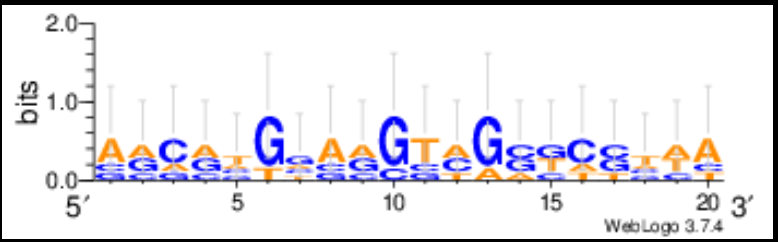